# Combine Google Trends with other Time Series Data

# Introduction

[Google Trends]('https://trends.google.com/trends/?geo=US') gives us an estimate of search volume. 

What can the popularity of search terms tell us about the world? Google Trends gives us access to the popularity of Google Search terms. 

Let's investigate:

* How search volume for "Bitcoin" relates to the price of Bitcoin

* How search volume for a hot stock like Telsa relates to that stock's price and

* How searches for "Unemployment Benefits" vary with the actual unemployment rate in the United States

<img src='https://live.staticflickr.com/65535/52242126305_3521b71fca_h.jpg' width=800>

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [44]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration


I've already added the import statements and created the four different DataFrames in this notebook. Your first step is to explore the data, by getting an understanding of what's actually in those .csv files for this project.

Start with df_tesla, then have a look at df_unemployment and finally, check out the two bitcoin DataFrames.

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest and smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
df_tesla.shape

(145, 3)

In [4]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-07-01,9,3.988
1,2010-08-01,7,3.896
2,2010-09-01,7,4.082
3,2010-10-01,8,4.368
4,2010-11-01,8,7.066


In [5]:
df_tesla.tail()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
140,2022-03-01,80,1077.599976
141,2022-04-01,85,870.760010
142,2022-05-01,79,758.260010
143,2022-06-01,79,673.419983
144,2022-07-01,68,776.580017


The df_tesla DataFrame has 145 rows and 3 columns: for the Month, the search popularity and the closing price of the Tesla stock.

In [6]:
print(f"Largest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].max()}")
print(f"Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}")

Largest value for Tesla in Web Search: 100
Smallest value for Tesla in Web Search: 7


In [7]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,145.000000,145.000000
mean,36.262069,162.941724
std,24.685809,280.784480
min,7.000000,3.896000
25%,17.000000,25.455999
50%,30.000000,48.174000
75%,49.000000,68.612000
max,100.000000,1144.760010


One of my favourite functions to run on DataFrames is `.describe()`. If you use `df_tesla.describe()`, you get a whole bunch of descriptive statistics. Right off the bat.

### Unemployment Data

In [8]:
df_unemployment.shape

(192, 3)

In [9]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,20,5.7
1,2004-02,17,5.6
2,2004-03,14,5.8
3,2004-04,14,5.6
4,2004-05,14,5.6


The unemployment DataFrame has 192 rows and 3 columns. As with Tesla, we have monthly data from 2004 onwards, organized in rows. 

In [10]:
print("Largest value for \"Unemployemnt Benefits\" "
       f"in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}")

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

With the Bitcoin data we see that we have two different .csv files. One of them has the day-by-day closing price and the trade volume of Bitcoin across 2869 rows. The other has the monthly search volume from Google Trends.

In [11]:
df_btc_price.shape

(2869, 3)

In [12]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-18,424.440002,34483200.0
1,2014-09-19,394.795990,37919700.0
2,2014-09-20,408.903992,36863600.0
3,2014-09-21,398.821014,26580100.0
4,2014-09-22,402.152008,24127600.0


In [13]:
df_btc_search.shape

(95, 2)

In [14]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,6
1,2014-10,5
2,2014-11,4
3,2014-12,5
4,2015-01,7


In [15]:
print(f"largest BTC News Search '{df_btc_search['BTC_NEWS_SEARCH'].max()}")

largest BTC News Search '100


### What do the Search Numbers mean?


We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as: 

>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.



For each word in your search, Google finds how much search volume in each region and time period, your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

For 3 of the DataFrames there are no missing values. We can verify this using the `.isna()` method. This will return a whole series of booleans, but we can chain `.values.any()` to see if any value in the series is True.

In [16]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


However, for the Bitcoin price data, there seems to be a problem. There's a missing value somewhere.

The number of missing values can be found by using `.sum()` to add up the number of occurrences of True in the series. This shows that there are 2 missing values.

To find the row where the missing values occur, we can create a subset of the DataFrame using `.isna()` once again (If you've arrived at this answer using a different approach, that's fine too. There are a number of ways to solve this challenge.)

In [17]:
print(f'Missing values? for BTC price?: {df_btc_price.isna().values.any()}')

Missing values? for BTC price?: True


In [18]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


In [19]:
df_btc_price[df_btc_price['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2868,2022-07-26,NaN,NaN


**Challenge**: Remove any missing values that you found. 

To remove a missing value we can use `.dropna()`. The `inplace` argument allows to overwrite our DataFrame and means we don't have to write:
`df_btc_price = df_btc_price.dropna()`

In [20]:
df_btc_price.dropna(inplace=True)

In [21]:
df_btc_price.isna().values.any()

False

### Convert Strings to DateTime Objects

**Challenge**: Our DataFrames contain time-series data. Do you remember how to check the data type of the entries in the DataFrame? Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [22]:
type(df_tesla['MONTH'][0])

str

All the date data in our columns are in the form of strings. To convert this into a Datetime object we're going to use the Pandas `.to_datetime()` function.

In [23]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [24]:
df_tesla['MONTH'].head()

0   2010-07-01
1   2010-08-01
2   2010-09-01
3   2010-10-01
4   2010-11-01
Name: MONTH, dtype: datetime64[ns]

In [25]:
df_btc_price['DATE'].head()

0   2014-09-18
1   2014-09-19
2   2014-09-20
3   2014-09-21
4   2014-09-22
Name: DATE, dtype: datetime64[ns]

## Resampling Time Series Data
Next, we have to think about how to make our Bitcoin price and our Bitcoin search volume comparable. Our Bitcoin price is daily data, but our Bitcoin Search Popularity is monthly data.

To convert our daily data into monthly data, we're going to use the `.resample()` function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use 'M'.  If you ever need to resample a time series to a different frequency, you can find a list of different options here (for example 'Y' for yearly or 'T' for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.

```df_btc_monthly = df_btc_price.resample('M', on='DATE').last()```

If we wanted the average price over the course of the month, we could use something like:

```df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()```


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [26]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [27]:
df_btc_monthly.shape

(95, 3)

In [28]:
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [29]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

### Tesla Stock Price v.s. Search Volume

Let's create a basic line chart of the Tesla stock price and the search popularity and then gradually add more and more styling to our chart.

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

To create a line plot with two different y-axes we first have to get the current axis and make a copy of it using `.twinx()`. Then we can configure each axis separately and call `.plot()`.

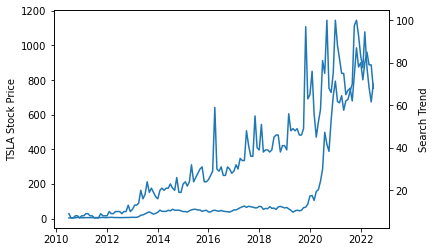

In [30]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'])
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'])

plt.show()

Now let's style the chart a bit more. In particular, let's check out the different colors you can use with Matplotlib.

For our updated chart, let's differentiate the two lines and the axis labels using different colours. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [color names](https://matplotlib.org/stable/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can color both the [axis labels](https://matplotlib.org/stable/api/text_api.html) and the [lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) on the chart using keyword arguments (kwargs).  

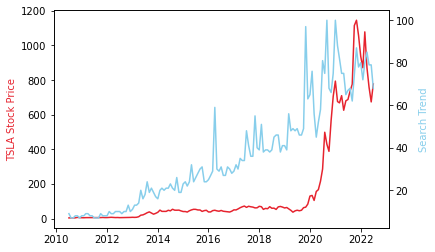

In [31]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue') # or a named colour

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#E6232E')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='skyblue')

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

First, we use `.figure()` to increase the size and resolution of our chart. Since we now have a bigger chart, we should also increase the font size of our labels and the thickness of our lines.

Finally, we are calling `.show()` to explicitly display the chart below the cell. This `.show()` method is important to be aware of if you're ever trying to generate charts in PyCharm or elsewhere outside of an interactive notebook like Jupyter or Google Colab. Also, it gives our notebook a very clean look.

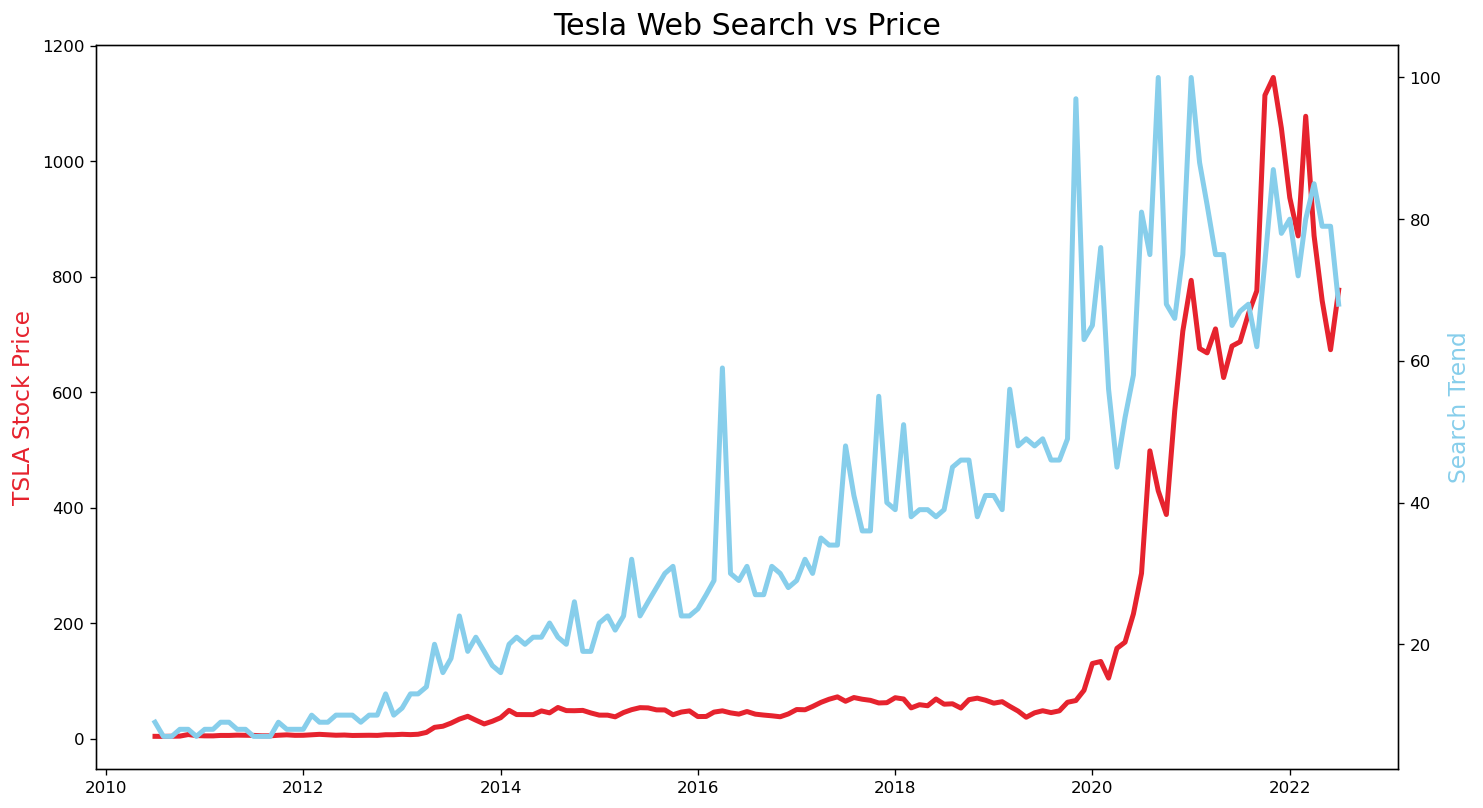

In [32]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#E6232E', linewidth=3)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='skyblue', linewidth=3)
 
# Displays chart explicitly
plt.show()

Here's the code with rotation added to the x-ticks. With `.set_ylim()` and `.set_xlim()` you have precise control over which data you want to show on the chart. You can either choose hard values like displaying the Tesla stock price between 0 and 600. Or you could use the `.min()` and `.max()` functions to help you work out the bounds for the chart as well.

In [33]:
df_tesla['TSLA_USD_CLOSE'].max()

1144.76001

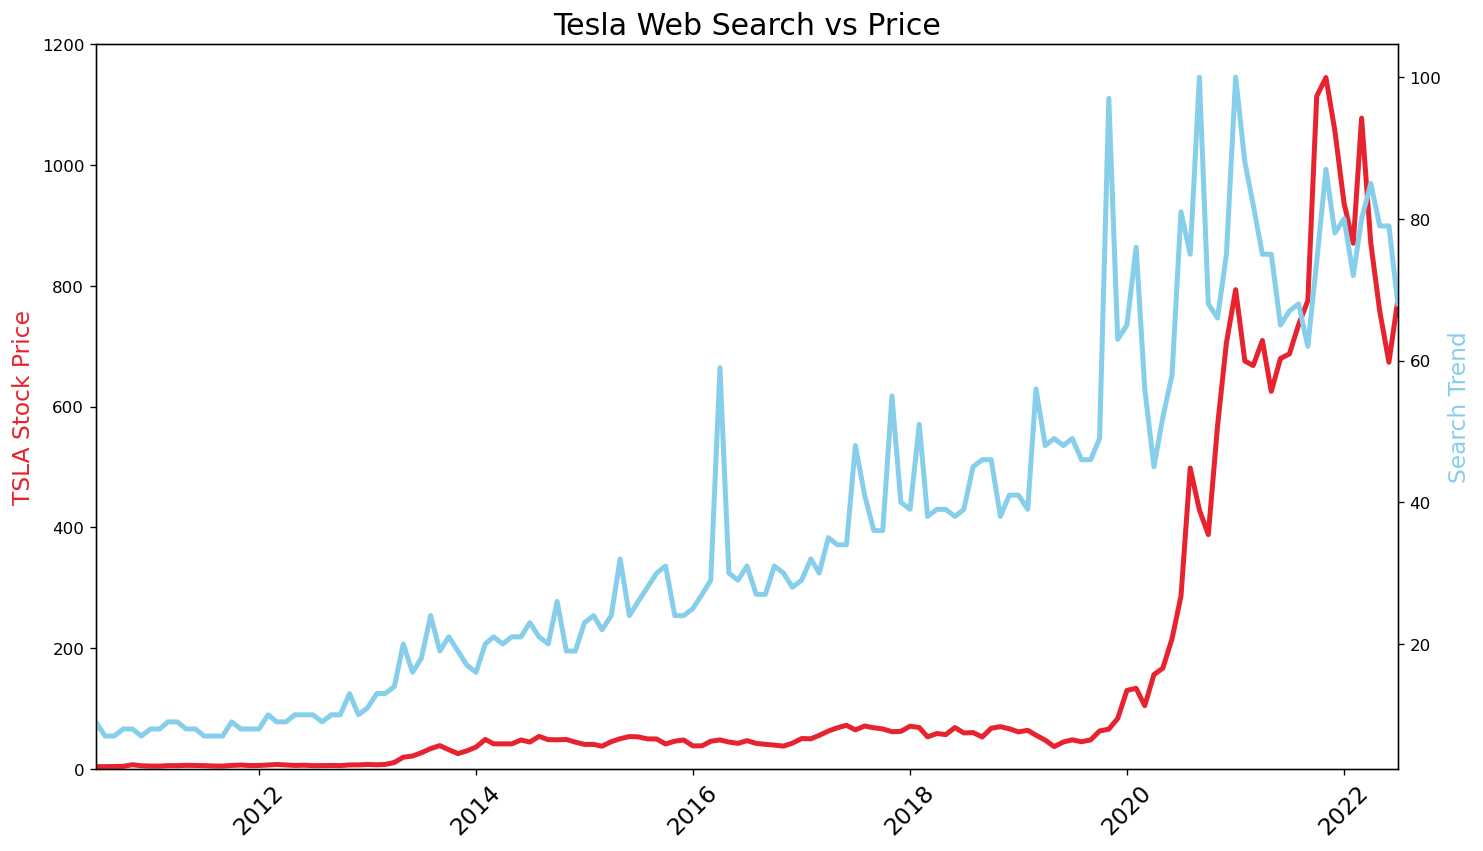

In [34]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim(0, 1200)
ax1.set_xlim(df_tesla['MONTH'].min(), df_tesla['MONTH'].max())
 
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#E6232E', linewidth=3)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='skyblue', linewidth=3)
 
plt.show()

### Adding Locator Tick Marks
When working with time series, it's often quite difficult to get the tick marks on charts looking the way you want to. This is why we have Locator helpers.

**How to add tick formatting for dates on the x-axis.**

The first step is importing matplotlib.dates.  This is where all the date plotting capabilities live.

Next, we need a `YearLocator()` and a `MonthLocator()` objects, which will help Matplotlib find the years and the months. Then we also need a `DateFormatter()`, which will help us specify how we want to display the dates. 

In [35]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

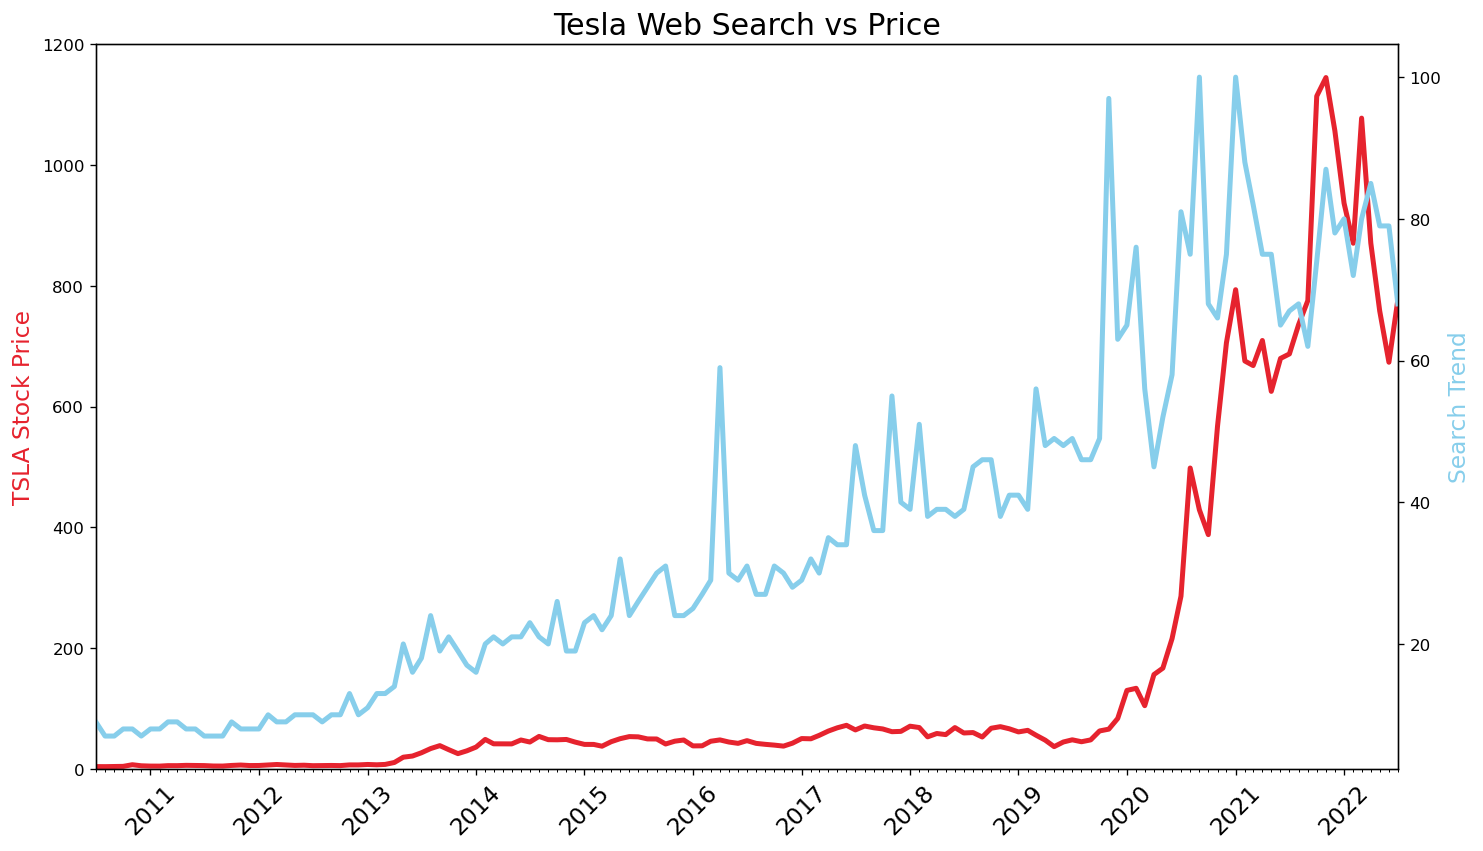

In [36]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim(0, 1200)
ax1.set_xlim([df_tesla['MONTH'].min(), df_tesla['MONTH'].max()])
 
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#E6232E', linewidth=3)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='skyblue', linewidth=3)
 
plt.show()

When we take a look at our chart, we can see the tick marks nicely. The tick marks also allow us to visually date that spike of interest in the middle of the chart - March 2016. This was when the Tesla Model 3 was unveiled. Also, we can clearly see that the most recent spikes in search coincide, not with the release of a new car, but the roaring stock price for the company!

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y axis label to 'BTC Price' <br>
3. Change the y and x axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/stable/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

Updating the title and the axis labels just involved changing the strings. To set the axis limits, I've chosen 0 to 70,000 on the left y-axis. I've also used a HEX code for orange to colour the line.

To change the line style or the markers, you just have to look at the documentation (e.g., try '--' or '-.' for the linestyle). Similarly for the markers, you also have loads of different options:

<img src='https://live.staticflickr.com/65535/52241977308_c89ed334f3_b.jpg' width=600>

The main trick with this challenge involved substituting a different set of dates. The months of the time series are found in the index of the monthly bitcoin prices: `df_btc_monthly.index`.

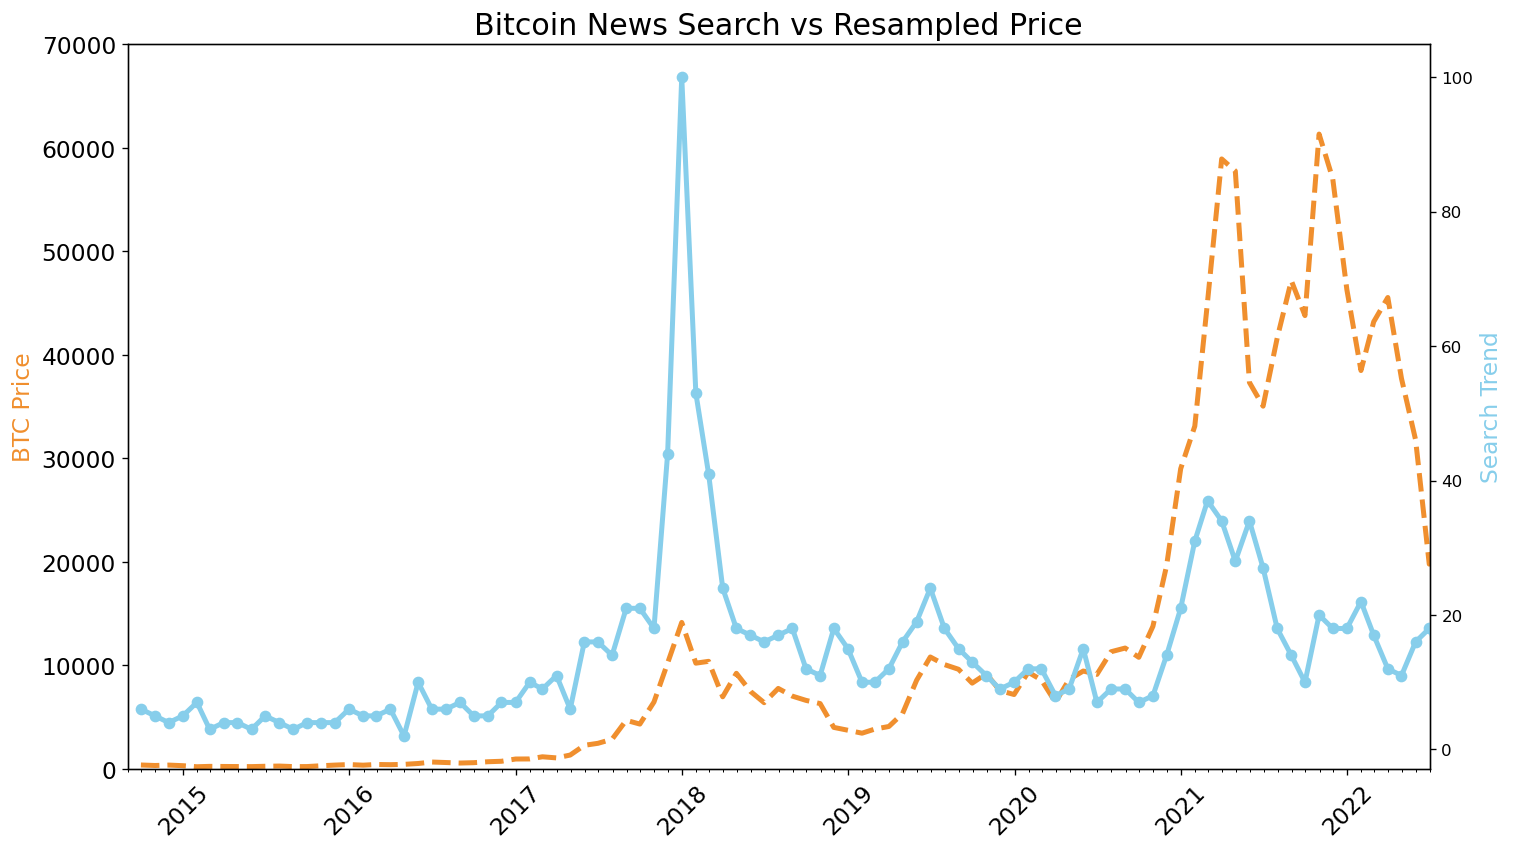

In [37]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# style lables and set axis limitation
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim([0, 70000])
ax1.set_xlim([df_btc_search['MONTH'].min(), df_btc_search['MONTH'].max()])

# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly['DATE'], df_btc_monthly['CLOSE'], color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search['BTC_NEWS_SEARCH'], color='skyblue', linewidth=3, marker='o')

plt.show()

What we see in the chart is that similar to Tesla, the price movements in the beginning of 2018 are associated with very high search volumes. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in the beginning of 2021, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style. <br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

There are relatively few changes you had to make here. Just the labels and the dataset we're using. The line of code I wanted you to figure out from the documentation was this one:

`ax1.grid(color='grey', linestyle='--')`

This overlays a grid of dashed lines.

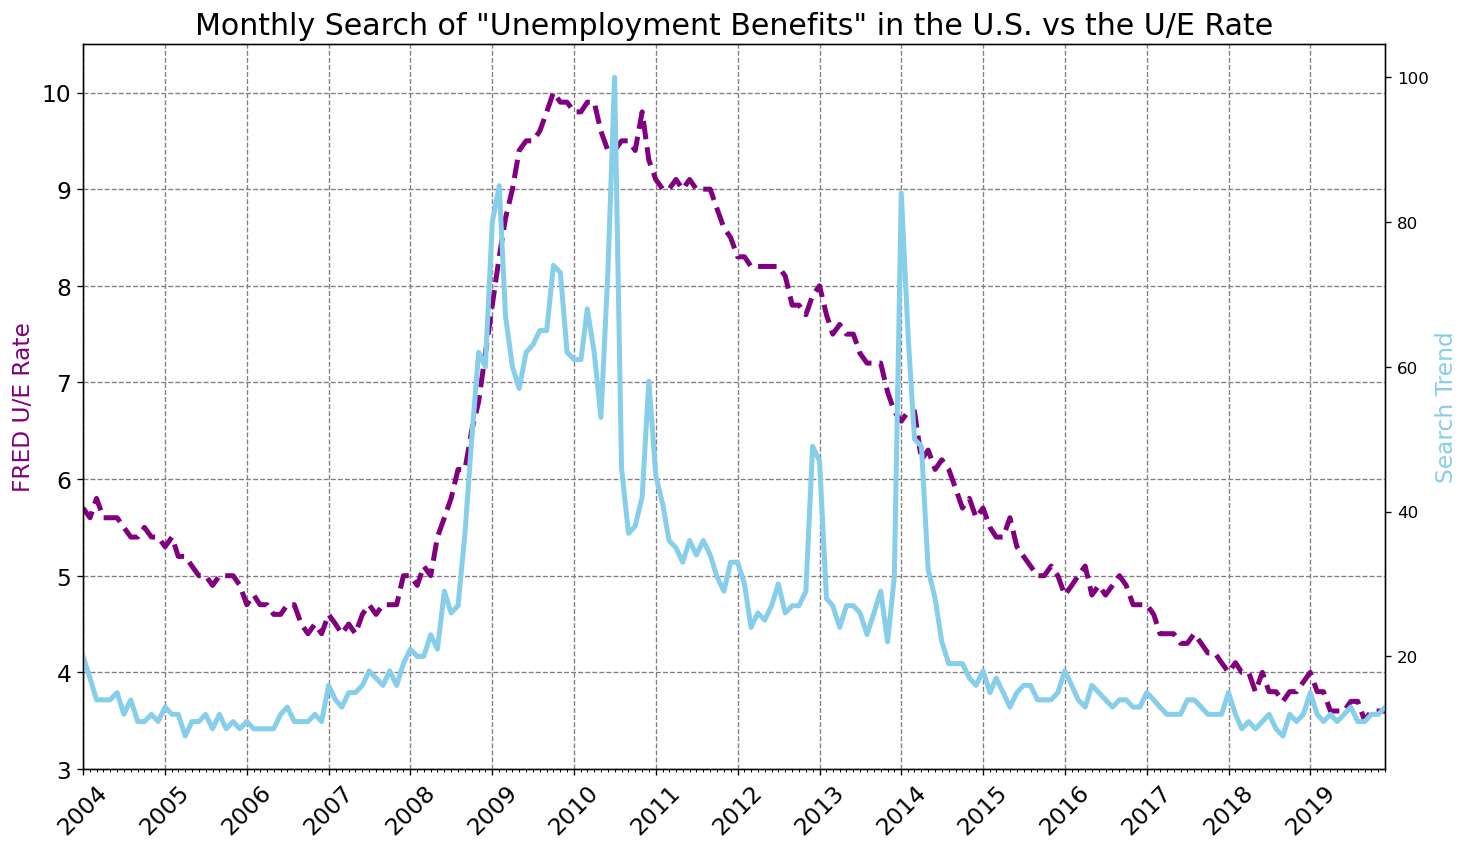

In [38]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], 
         color='skyblue', linewidth=3)

plt.show()

Notice how we can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". Many of the spikes are at year end in December. This clearly shows that there is seasonality in the job market. What else do we see? We see that the financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis.

**Challenge**: Calculate the 3-month rolling average for the web searches. Plot the 3-month or 6-month rolling average search data against the actual unemployment. 


You can create a rolling average using .rolling() and .mean() functions together.

`roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()`

In [42]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
roll_df

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
187,11.666667,3.666667
188,11.666667,3.616667
189,11.666667,3.616667
190,11.833333,3.616667


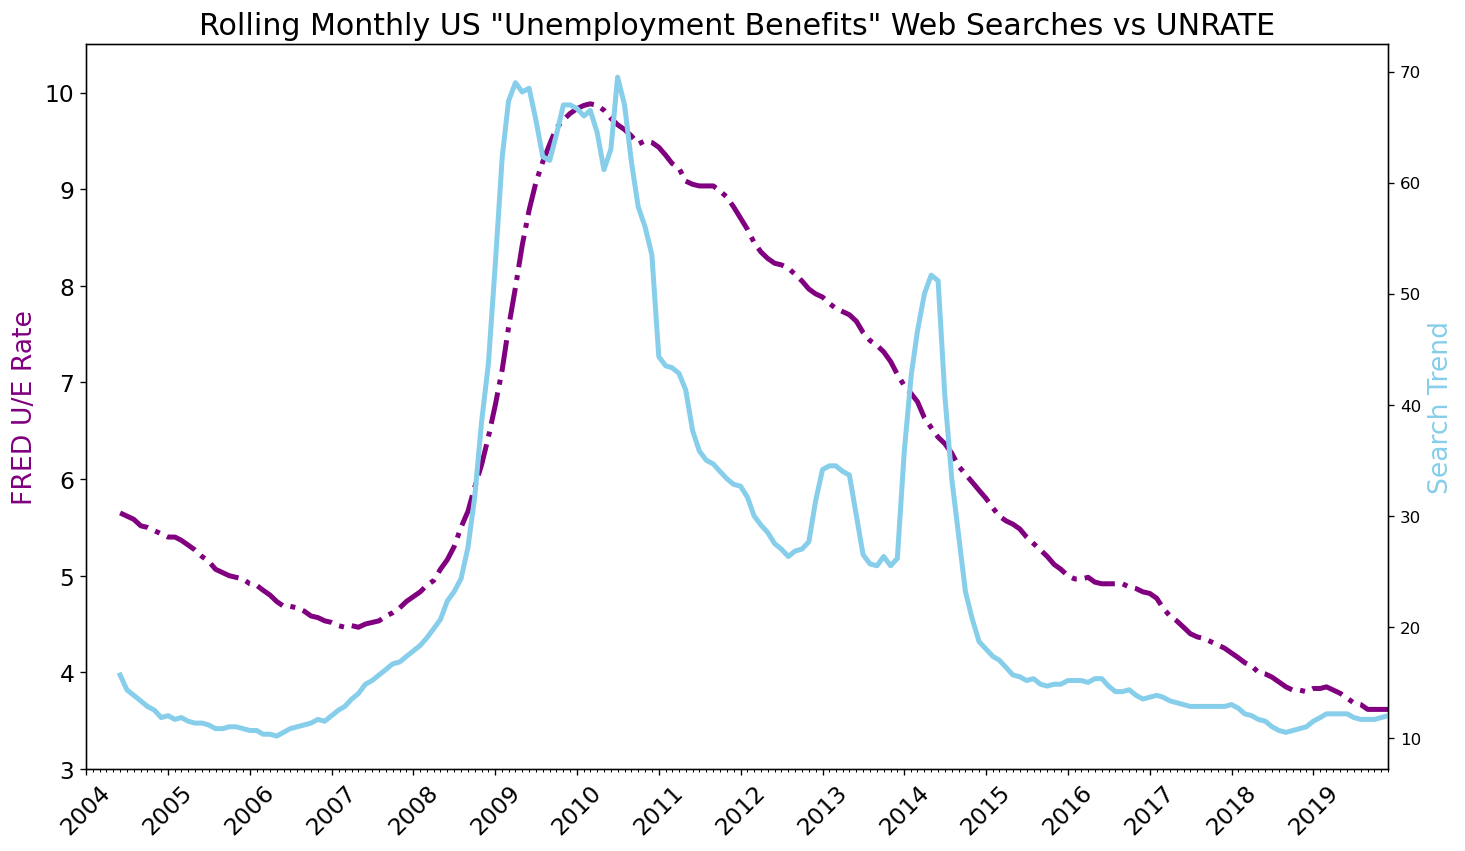

In [39]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment['MONTH'], roll_df['UNRATE'], 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment['MONTH'], roll_df['UE_BENEFITS_WEB_SEARCH'], 'skyblue', linewidth=3)

plt.show()

What is this telling us? We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate (which is a lagging indicator).

### Including 2020-22 in Unemployment Charts

The financial crisis in 2008 was pretty bad. We saw how it took around 10 years for the unemployment rate to go back to where it was prior to the crisis.

Let's see how 2020-22 affects our analysis.

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-22.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [40]:
df_ue_2022 = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-22.csv')
df_ue_2022['MONTH'] = pd.to_datetime(df_ue_2022['MONTH'])

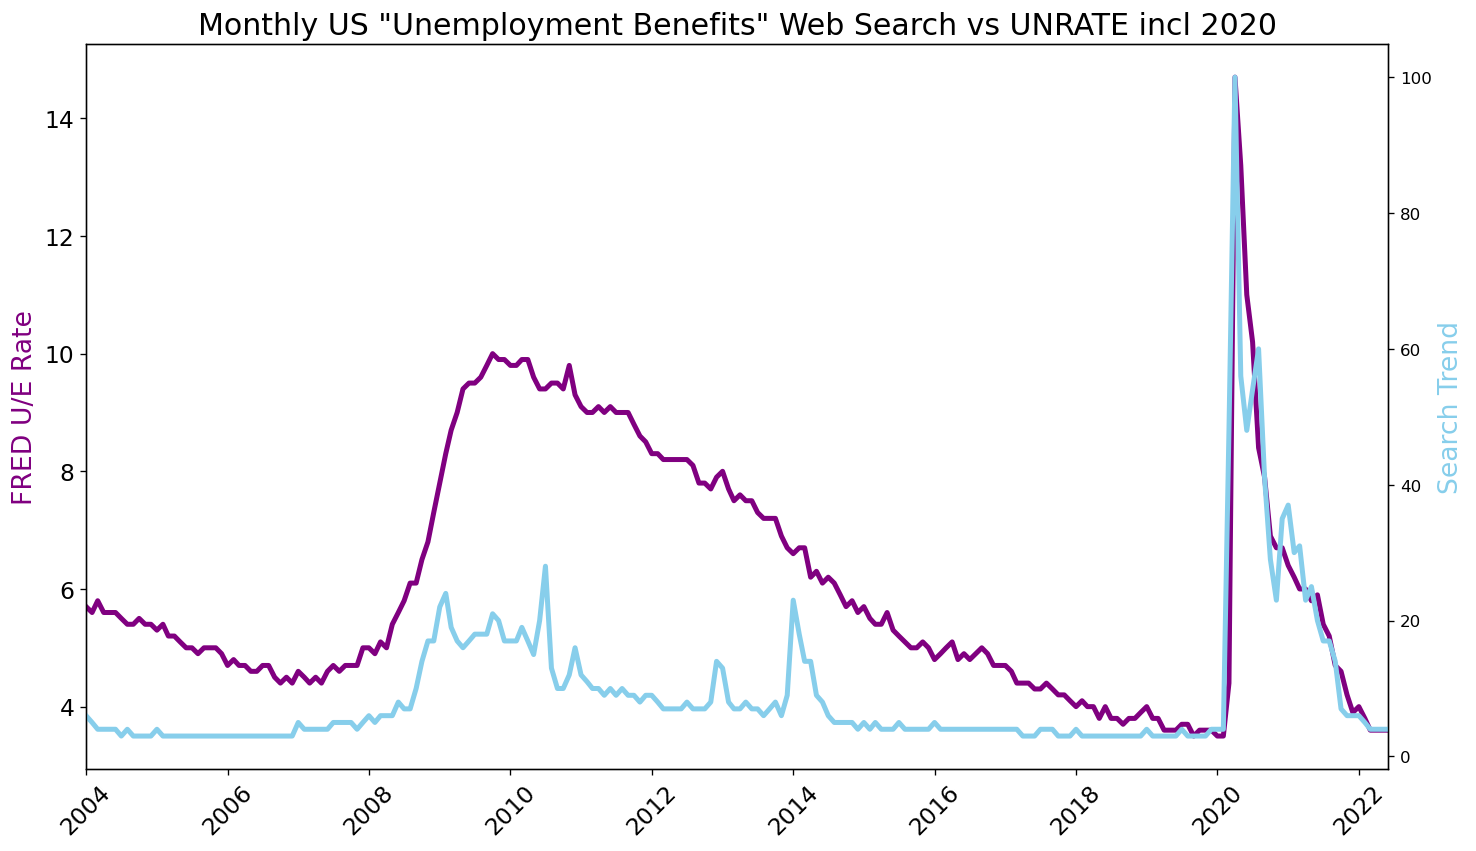

In [41]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2022['MONTH'].min(), df_ue_2022['MONTH'].max()])

ax1.plot(df_ue_2022['MONTH'], df_ue_2022['UNRATE'], 'purple', linewidth=3)
ax2.plot(df_ue_2022['MONTH'], df_ue_2022['UE_BENEFITS_WEB_SEARCH'], 'skyblue', linewidth=3)

plt.show()

The US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis. But the recovery is swifter this time.